In [25]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import MinMaxScaler

Preprocessing code from
https://www.kaggle.com/code/phamvanvung/cmapss

In [7]:
setNumber = 1
dataPath = './CMAPSSData'

In [1]:
id_col = ['id']
cycle_col = ['cycle']
setting_cols = ['setting1', 'setting2', 'setting3']
sensor_cols = ['sensor' + str(i) for i in range(1, 22)]
rul_col = ['RUL']
all_cols = id_col + cycle_col + setting_cols + sensor_cols + rul_col

In [2]:
# This section is to load data
def loadData(fileName):
    data = pd.read_csv(fileName, sep=" ", header=None)
    data.drop([26, 27], axis = 1, inplace=True)
    data.columns = id_col + cycle_col + setting_cols +sensor_cols
    return data

In [3]:
# load train RUL also returns the max cycle, and this max cycle is also the life cylce
def addTrainRul(data, decrease_threshold=None):
    lifeCycles = {mcId: data[data['id']==mcId]['cycle'].max() for mcId in data['id'].unique()}
    if decrease_threshold == None: decrease_threshold = 1
    ruls = [lifeCycles[row[0]] - decrease_threshold if row[1] < decrease_threshold else lifeCycles[row[0]] - row[1] for row in data.values]
    data['RUL'] = ruls
    return lifeCycles
    
# use this last one only, return the data as well as the max life cycles
def loadTrainData(setNumber, decrease_threshold=None):
    fileName = dataPath + '/train_FD00' + str(setNumber) + '.txt'
    data = loadData(fileName)
    lifeCycles = addTrainRul(data, decrease_threshold)
    return data, lifeCycles

In [10]:
decrease_threshold = None

In [12]:
def loadTestRul(fileName):
    data = pd.read_csv(fileName, sep = " ", header=None)
    data.drop([1], axis=1, inplace=True)
    data.columns = ['RUL']
    return data
def addTestRul(data, rulData, decrease_threshold=None):
    testRuls = {i+1: rulData.iloc[i, 0] for i in range(len(rulData))}
    lifeCycles = {mcId: data[data['id']==mcId]['cycle'].max() + testRuls[mcId] for mcId in data['id'].unique()}
    if decrease_threshold == None: decrease_threshold = 1
    ruls = [lifeCycles[row[0]] - decrease_threshold if row[1] < decrease_threshold else lifeCycles[row[0]] - row[1] for row in data.values]
    data['RUL'] = ruls
    return lifeCycles
# Use this last one only => return data as well as the max life cycles for each machine
def loadTestData(setNumber, decrease_threshold=None):
    data = loadData(dataPath + '/test_FD00' +str(setNumber)+'.txt')
    rulData = loadTestRul(dataPath + '/RUL_FD00' + str(setNumber)+'.txt')
    lifeCycles = addTestRul(data, rulData, decrease_threshold)
    return data, lifeCycles

In [18]:
train_datasets, train_lifecycles, test_datasets, test_lifecycles = [], [], [], []
for i in range(4):
    train, trainLifeCycles = loadTrainData(setNumber, decrease_threshold)
    train_datasets.append(train)
    train_lifecycles.append(trainLifeCycles)
    
    test, testLifeCycles = loadTestData(setNumber, decrease_threshold)
    test_datasets.append(test)
    test_lifecycles.append(testLifeCycles)

In [48]:
def split_by_id(dataset, dataset_no=1):
    split_data = []
    ruls = []
    for id_no in np.unique(dataset['id']):
        split = dataset.groupby('id').get_group(id_no)
        split['id'] = split['id'] + 100 * (dataset_no-1)
        rul = split['RUL']
        split = split.drop('RUL', axis=1)
        split_data.append(split)
        ruls.append(rul)
        
    return split_data, ruls

In [49]:
X_train = []
y_train = []
X_test = []
y_test = []

for i in range(4):
    split_data, ruls = split_by_id(train_datasets[i], i+1)
    X_train.append(split_data)
    y_train.append(ruls)
    
    split_data, ruls = split_by_id(test_datasets[i], i+1)
    X_test.append(split_data)
    y_test.append(ruls)

C:\Users\austi\AppData\Local\Temp\ipykernel_5748\2859270079.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  split['id'] = split['id'] + 100 * (dataset_no-1)
C:\Users\austi\AppData\Local\Temp\ipykernel_5748\2859270079.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  split['id'] = split['id'] + 100 * (dataset_no-1)
C:\Users\austi\AppData\Local\Temp\ipykernel_5748\2859270079.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

C:\Users\austi\AppData\Local\Temp\ipykernel_5748\2859270079.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  split['id'] = split['id'] + 100 * (dataset_no-1)
C:\Users\austi\AppData\Local\Temp\ipykernel_5748\2859270079.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  split['id'] = split['id'] + 100 * (dataset_no-1)
C:\Users\austi\AppData\Local\Temp\ipykernel_5748\2859270079.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

C:\Users\austi\AppData\Local\Temp\ipykernel_5748\2859270079.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  split['id'] = split['id'] + 100 * (dataset_no-1)
C:\Users\austi\AppData\Local\Temp\ipykernel_5748\2859270079.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  split['id'] = split['id'] + 100 * (dataset_no-1)
C:\Users\austi\AppData\Local\Temp\ipykernel_5748\2859270079.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

C:\Users\austi\AppData\Local\Temp\ipykernel_5748\2859270079.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  split['id'] = split['id'] + 100 * (dataset_no-1)
C:\Users\austi\AppData\Local\Temp\ipykernel_5748\2859270079.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  split['id'] = split['id'] + 100 * (dataset_no-1)
C:\Users\austi\AppData\Local\Temp\ipykernel_5748\2859270079.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

C:\Users\austi\AppData\Local\Temp\ipykernel_5748\2859270079.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  split['id'] = split['id'] + 100 * (dataset_no-1)
C:\Users\austi\AppData\Local\Temp\ipykernel_5748\2859270079.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  split['id'] = split['id'] + 100 * (dataset_no-1)
C:\Users\austi\AppData\Local\Temp\ipykernel_5748\2859270079.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

C:\Users\austi\AppData\Local\Temp\ipykernel_5748\2859270079.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  split['id'] = split['id'] + 100 * (dataset_no-1)
C:\Users\austi\AppData\Local\Temp\ipykernel_5748\2859270079.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  split['id'] = split['id'] + 100 * (dataset_no-1)
C:\Users\austi\AppData\Local\Temp\ipykernel_5748\2859270079.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

C:\Users\austi\AppData\Local\Temp\ipykernel_5748\2859270079.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  split['id'] = split['id'] + 100 * (dataset_no-1)
C:\Users\austi\AppData\Local\Temp\ipykernel_5748\2859270079.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  split['id'] = split['id'] + 100 * (dataset_no-1)
C:\Users\austi\AppData\Local\Temp\ipykernel_5748\2859270079.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

C:\Users\austi\AppData\Local\Temp\ipykernel_5748\2859270079.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  split['id'] = split['id'] + 100 * (dataset_no-1)
C:\Users\austi\AppData\Local\Temp\ipykernel_5748\2859270079.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  split['id'] = split['id'] + 100 * (dataset_no-1)
C:\Users\austi\AppData\Local\Temp\ipykernel_5748\2859270079.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

In [50]:
X_train

[[     id  cycle  setting1  setting2  setting3  sensor1  sensor2  sensor3   
  0     1      1   -0.0007   -0.0004     100.0   518.67   641.82  1589.70  \
  1     1      2    0.0019   -0.0003     100.0   518.67   642.15  1591.82   
  2     1      3   -0.0043    0.0003     100.0   518.67   642.35  1587.99   
  3     1      4    0.0007    0.0000     100.0   518.67   642.35  1582.79   
  4     1      5   -0.0019   -0.0002     100.0   518.67   642.37  1582.85   
  ..   ..    ...       ...       ...       ...      ...      ...      ...   
  187   1    188   -0.0067    0.0003     100.0   518.67   643.75  1602.38   
  188   1    189   -0.0006    0.0002     100.0   518.67   644.18  1596.17   
  189   1    190   -0.0027    0.0001     100.0   518.67   643.64  1599.22   
  190   1    191   -0.0000   -0.0004     100.0   518.67   643.34  1602.36   
  191   1    192    0.0009   -0.0000     100.0   518.67   643.54  1601.41   
  
       sensor4  sensor5  ...  sensor12  sensor13  sensor14  sensor15  sen

In [54]:
tmp = np.array(X_train)

C:\Users\austi\AppData\Local\Temp\ipykernel_5748\3426559058.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  tmp = np.array(X_train)


In [60]:
tmp[0].shape

(100,)

In [50]:
class CMAPSSTrainDataset(Dataset):
    def __init__(self):
        self.ragged_data = []
        X_train, y_train, _, _ = self.load_split_datasets()
        for i in range(len(X_train)):
            for j in range(len(X_train[i])):
                self.ragged_data.append([np.array(X_train[i][j]), np.array(y_train[i][j])])
        
        self.pad_len = np.max([x[0].shape for x in self.ragged_data])
        
        self.data = []
        for X, y in self.ragged_data:
            padded_X = np.pad(X, ((0, self.pad_len-X.shape[0]), (0,0)))
            padded_y = np.pad(y, ((0, self.pad_len-y.shape[0])))
            self.data.append([padded_X, padded_y])
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        sensors, rul = self.data[idx]
        return torch.from_numpy(sensors), torch.from_numpy(rul)
    
    def load_split_datasets(self):
        dataPath = './CMAPSSData'
        id_col = ['id']
        cycle_col = ['cycle']
        setting_cols = ['setting1', 'setting2', 'setting3']
        sensor_cols = ['sensor' + str(i) for i in range(1, 22)]
        rul_col = ['RUL']
        all_cols = id_col + cycle_col + setting_cols + sensor_cols + rul_col
        
                # This section is to load data
        def loadData(fileName):
            data = pd.read_csv(fileName, sep=" ", header=None)
            data.drop([26, 27], axis = 1, inplace=True)
            data.columns = id_col + cycle_col + setting_cols +sensor_cols
            return data
        
                # load train RUL also returns the max cycle, and this max cycle is also the life cylce
        def addTrainRul(data, decrease_threshold=None):
            lifeCycles = {mcId: data[data['id']==mcId]['cycle'].max() for mcId in data['id'].unique()}
            if decrease_threshold == None: decrease_threshold = 1
            ruls = [lifeCycles[row[0]] - decrease_threshold if row[1] < decrease_threshold else lifeCycles[row[0]] - row[1] for row in data.values]
            data['RUL'] = ruls
            return lifeCycles

        # use this last one only, return the data as well as the max life cycles
        def loadTrainData(setNumber, decrease_threshold=None):
            fileName = dataPath + '/train_FD00' + str(setNumber) + '.txt'
            data = loadData(fileName)
            lifeCycles = addTrainRul(data, decrease_threshold)
            return data, lifeCycles
        
        decrease_threshold = None
        
        def loadTestRul(fileName):
            data = pd.read_csv(fileName, sep = " ", header=None)
            data.drop([1], axis=1, inplace=True)
            data.columns = ['RUL']
            return data
        def addTestRul(data, rulData, decrease_threshold=None):
            testRuls = {i+1: rulData.iloc[i, 0] for i in range(len(rulData))}
            lifeCycles = {mcId: data[data['id']==mcId]['cycle'].max() + testRuls[mcId] for mcId in data['id'].unique()}
            if decrease_threshold == None: decrease_threshold = 1
            ruls = [lifeCycles[row[0]] - decrease_threshold if row[1] < decrease_threshold else lifeCycles[row[0]] - row[1] for row in data.values]
            data['RUL'] = ruls
            return lifeCycles
        # Use this last one only => return data as well as the max life cycles for each machine
        def loadTestData(setNumber, decrease_threshold=None):
            data = loadData(dataPath + '/test_FD00' +str(setNumber)+'.txt')
            rulData = loadTestRul(dataPath + '/RUL_FD00' + str(setNumber)+'.txt')
            lifeCycles = addTestRul(data, rulData, decrease_threshold)
            return data, lifeCycles
        
        train_datasets, train_lifecycles, test_datasets, test_lifecycles = [], [], [], []
        for i in range(4):
            scaler = MinMaxScaler()
            setNumber = i+1
            train, trainLifeCycles = loadTrainData(setNumber, decrease_threshold)
            target = train['RUL'].copy()
            transformed_train = scaler.fit_transform(train)
            train = pd.DataFrame(transformed_train, columns=train.columns, index=train.index)
            train['RUL'] = target
            train_datasets.append(train)
            train_lifecycles.append(trainLifeCycles)

            test, testLifeCycles = loadTestData(setNumber, decrease_threshold)
            target = test['RUL'].copy()
            transformed_test = scaler.transform(test)
            test = pd.DataFrame(transformed_test, columns=test.columns, index=test.index)
            test['RUL'] = target
            test_datasets.append(test)
            test_lifecycles.append(testLifeCycles)
        
        X_train = []
        y_train = []
        X_test = []
        y_test = []

        for i in range(4):
            split_data, ruls = self.split_by_id(train_datasets[i], i+1)
            X_train.append(split_data)
            y_train.append(ruls)

            split_data, ruls = self.split_by_id(test_datasets[i], i+1)
            X_test.append(split_data)
            y_test.append(ruls)
            
        return X_train, y_train, X_test, y_test
        
    def split_by_id(self, dataset, dataset_no=1):
        split_data = []
        ruls = []
        for id_no in np.unique(dataset['id']):
            split = dataset.groupby('id').get_group(id_no).copy()
            split['dataset_no'] = dataset_no
            rul = split['RUL']
            split = split.drop('RUL', axis=1)
            split_data.append(split)
            ruls.append(rul)

        return split_data, ruls
        

In [45]:
class CMAPSSTestDataset(Dataset):
    def __init__(self, size):
        self.ragged_data = []
        _, _, X_test, y_test = self.load_split_datasets()
        for i in range(len(X_test)):
            for j in range(len(X_test[i])):
                self.ragged_data.append([np.array(X_test[i][j]), np.array(y_test[i][j])])
        
        self.pad_len = size
        
        self.data = []
        for X, y in self.ragged_data:
            padded_X = np.pad(X, ((0, self.pad_len-X.shape[0]), (0,0)))
            padded_y = np.pad(y, ((0, self.pad_len-y.shape[0])))
            self.data.append([padded_X, padded_y])
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        sensors, rul = self.data[idx]
        return torch.from_numpy(sensors), torch.from_numpy(rul)
    
    def load_split_datasets(self):
        dataPath = './CMAPSSData'
        id_col = ['id']
        cycle_col = ['cycle']
        setting_cols = ['setting1', 'setting2', 'setting3']
        sensor_cols = ['sensor' + str(i) for i in range(1, 22)]
        rul_col = ['RUL']
        all_cols = id_col + cycle_col + setting_cols + sensor_cols + rul_col
        
                # This section is to load data
        def loadData(fileName):
            data = pd.read_csv(fileName, sep=" ", header=None)
            data.drop([26, 27], axis = 1, inplace=True)
            data.columns = id_col + cycle_col + setting_cols +sensor_cols
            return data
        
                # load train RUL also returns the max cycle, and this max cycle is also the life cylce
        def addTrainRul(data, decrease_threshold=None):
            lifeCycles = {mcId: data[data['id']==mcId]['cycle'].max() for mcId in data['id'].unique()}
            if decrease_threshold == None: decrease_threshold = 1
            ruls = [lifeCycles[row[0]] - decrease_threshold if row[1] < decrease_threshold else lifeCycles[row[0]] - row[1] for row in data.values]
            data['RUL'] = ruls
            return lifeCycles

        # use this last one only, return the data as well as the max life cycles
        def loadTrainData(setNumber, decrease_threshold=None):
            fileName = dataPath + '/train_FD00' + str(setNumber) + '.txt'
            data = loadData(fileName)
            lifeCycles = addTrainRul(data, decrease_threshold)
            return data, lifeCycles
        
        decrease_threshold = None
        
        def loadTestRul(fileName):
            data = pd.read_csv(fileName, sep = " ", header=None)
            data.drop([1], axis=1, inplace=True)
            data.columns = ['RUL']
            return data
        def addTestRul(data, rulData, decrease_threshold=None):
            testRuls = {i+1: rulData.iloc[i, 0] for i in range(len(rulData))}
            lifeCycles = {mcId: data[data['id']==mcId]['cycle'].max() + testRuls[mcId] for mcId in data['id'].unique()}
            if decrease_threshold == None: decrease_threshold = 1
            ruls = [lifeCycles[row[0]] - decrease_threshold if row[1] < decrease_threshold else lifeCycles[row[0]] - row[1] for row in data.values]
            data['RUL'] = ruls
            return lifeCycles
        # Use this last one only => return data as well as the max life cycles for each machine
        def loadTestData(setNumber, decrease_threshold=None):
            data = loadData(dataPath + '/test_FD00' +str(setNumber)+'.txt')
            rulData = loadTestRul(dataPath + '/RUL_FD00' + str(setNumber)+'.txt')
            lifeCycles = addTestRul(data, rulData, decrease_threshold)
            return data, lifeCycles
        
        train_datasets, train_lifecycles, test_datasets, test_lifecycles = [], [], [], []
        for i in range(4):
            scaler = MinMaxScaler()
            setNumber = i+1
            train, trainLifeCycles = loadTrainData(setNumber, decrease_threshold)
            transformed_train = scaler.fit_transform(train)
            train = pd.DataFrame(transformed_train, columns=train.columns, index=train.index)
            train_datasets.append(train)
            train_lifecycles.append(trainLifeCycles)

            test, testLifeCycles = loadTestData(setNumber, decrease_threshold)
            transformed_test = scaler.transform(test)
            test = pd.DataFrame(transformed_test, columns=test.columns, index=test.index)
            test_datasets.append(test)
            test_lifecycles.append(testLifeCycles)
        
        X_train = []
        y_train = []
        X_test = []
        y_test = []

        for i in range(4):
            split_data, ruls = self.split_by_id(train_datasets[i], i+1)
            X_train.append(split_data)
            y_train.append(ruls)

            split_data, ruls = self.split_by_id(test_datasets[i], i+1)
            X_test.append(split_data)
            y_test.append(ruls)
            
        return X_train, y_train, X_test, y_test
        
    def split_by_id(self, dataset, dataset_no=1):
        split_data = []
        ruls = []
        for id_no in np.unique(dataset['id']):
            split = dataset.groupby('id').get_group(id_no).copy()
            split['dataset_no'] = dataset_no
            rul = split['RUL']
            split = split.drop('RUL', axis=1)
            split_data.append(split)
            ruls.append(rul)

        return split_data, ruls

In [51]:
traindata = CMAPSSTrainDataset()
trainloader = DataLoader(traindata, batch_size=32, shuffle=True)
size = next(enumerate(trainloader))[1][0].shape[1]

AttributeError: 'list' object has no attribute 'columns'

In [47]:
testdata = CMAPSSTestDataset(size)
testloader = DataLoader(testdata, batch_size=32, shuffle=True)

In [30]:
example = next(enumerate(trainloader))

In [48]:
example_test = next(enumerate(testloader))

In [49]:
example_test[1][0].shape

torch.Size([32, 543, 27])

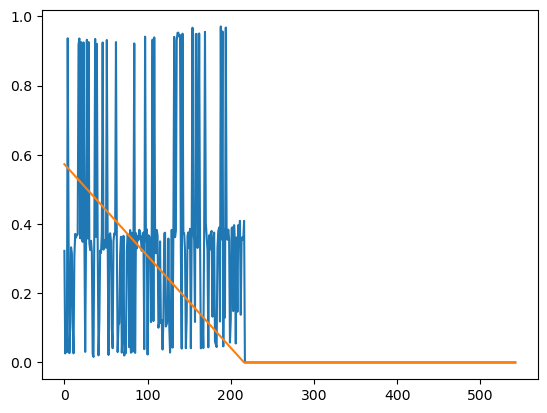

In [37]:
plt.plot(example[1][0][0].detach().numpy()[:,19])
plt.plot(example[1][1][0].detach().numpy())